In [1481]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1482]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joypy

In [1483]:
df = pd.read_csv('https://raw.githubusercontent.com/ondata/covid19italia/master/webservices/vaccini/processing/fasceEta.csv')
df.head()

,fascia,vaccinazioni,aggiornamento,dataAggiornamento
0,16-19,66,1/2/2021 1:36:21 PM,2021-01-02 13:36:21
1,20-29,4428,1/2/2021 1:36:21 PM,2021-01-02 13:36:21
2,30-39,8033,1/2/2021 1:36:21 PM,2021-01-02 13:36:21
3,40-49,10579,1/2/2021 1:36:21 PM,2021-01-02 13:36:21
4,50-59,13194,1/2/2021 1:36:21 PM,2021-01-02 13:36:21


In [1484]:
df.drop('aggiornamento', axis=1, inplace=True)
df.dataAggiornamento = pd.to_datetime(df.dataAggiornamento).dt.date
df.dataAggiornamento = pd.to_datetime(df.dataAggiornamento).dt.strftime('%d/%m/%Y')
df = df[['dataAggiornamento','fascia','vaccinazioni']]
df = df[df.fascia != '<=15']

In [1485]:
df.groupby('fascia')['vaccinazioni'].last()

fascia
16-19      3619
20-29    133795
30-39    183282
40-49    237728
50-59    308866
60-69    175491
70-79     36753
80-89     52938
90+       34551
Name: vaccinazioni, dtype: int64

In [1486]:
df1 = df.groupby(['dataAggiornamento','fascia'])[['vaccinazioni']].last().reset_index(level=1).pivot(columns='fascia',values='vaccinazioni')
df1

fascia,16-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+
dataAggiornamento,,,,,,,,,
02/01/2021,109,7195,12869,16619,20601,10781,1144,1775,1304
03/01/2021,132,12351,20694,27156,33552,17828,1751,2624,1948
04/01/2021,171,16606,27911,36346,45388,23333,2298,3484,2642
05/01/2021,194,19412,33991,43630,54964,29103,2823,3875,3019
06/01/2021,368,33084,55852,71104,91507,50642,5670,7208,5642
07/01/2021,473,41623,70216,89488,116080,63716,7680,9927,7841
08/01/2021,603,50484,83384,107137,139685,75819,9726,12590,9759
09/01/2021,843,60392,97986,125598,164535,92741,12754,15944,12257
10/01/2021,1136,68224,107662,137406,179999,103215,14649,17555,13373


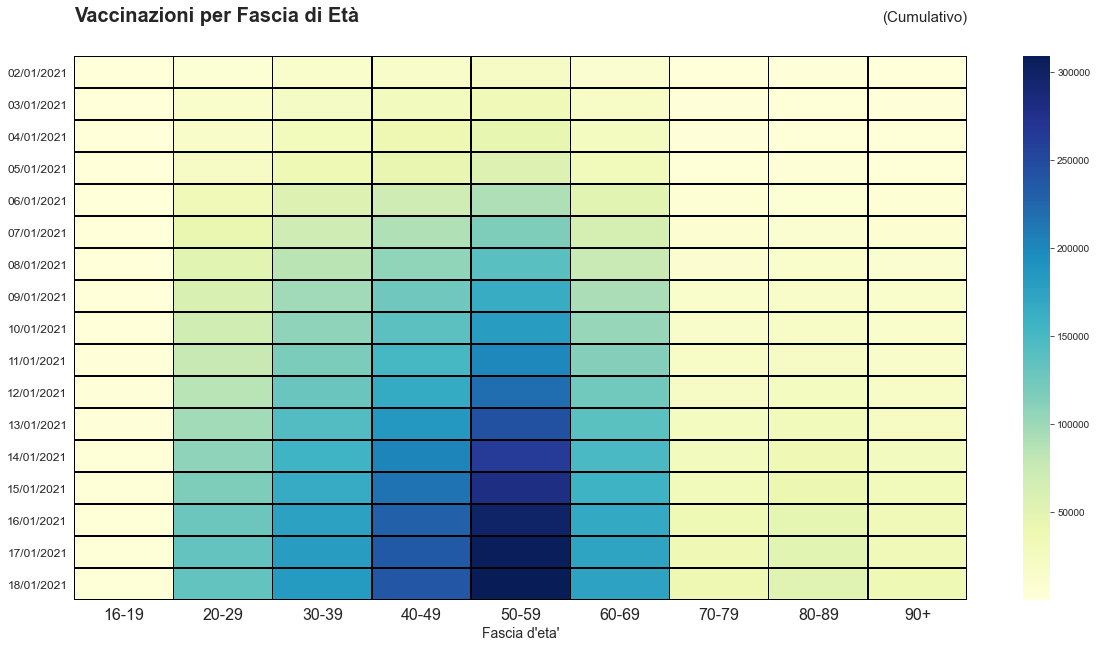

In [1487]:
plt.figure(figsize=(20,10))
sns.heatmap(df1, cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.yticks(rotation=0, fontsize=12)
plt.ylabel('')
plt.xlabel("Fascia d'eta'", fontsize=14)
plt.xticks(fontsize=16)
plt.title('Vaccinazioni per Fascia di Età', fontdict=dict(fontsize=20,weight='bold'), pad=25, loc='left')
plt.title('(Cumulativo)', loc='right', pad=35, fontsize=15)

plt.savefig("cumulativo.png")




In [1488]:
df1 = df.groupby(['fascia','dataAggiornamento'])[['vaccinazioni']].last().reset_index()
df1

,fascia,dataAggiornamento,vaccinazioni
0,16-19,02/01/2021,109
1,16-19,03/01/2021,132
2,16-19,04/01/2021,171
3,16-19,05/01/2021,194
4,16-19,06/01/2021,368
...,...,...,...
148,90+,14/01/2021,26330
149,90+,15/01/2021,29597
150,90+,16/01/2021,32505
151,90+,17/01/2021,33684


In [1489]:
daily = df1.groupby('dataAggiornamento')[['vaccinazioni']].sum().reset_index()
daily


,dataAggiornamento,vaccinazioni
0,02/01/2021,72397
1,03/01/2021,118036
2,04/01/2021,158179
3,05/01/2021,191011
4,06/01/2021,321077
5,07/01/2021,407044
6,08/01/2021,489187
7,09/01/2021,583050
8,10/01/2021,643219
9,11/01/2021,714306


In [1490]:
df1 = df1.merge(daily, left_on='dataAggiornamento', right_on='dataAggiornamento', suffixes=('','_totale_giorno'))

In [1491]:
df1['perc_tot'] = ((df1.vaccinazioni/df1.vaccinazioni_totale_giorno)*100).round(1)

In [1492]:
df1

,fascia,dataAggiornamento,vaccinazioni,vaccinazioni_totale_giorno,perc_tot
0,16-19,02/01/2021,109,72397,0.2
1,20-29,02/01/2021,7195,72397,9.9
2,30-39,02/01/2021,12869,72397,17.8
3,40-49,02/01/2021,16619,72397,23.0
4,50-59,02/01/2021,20601,72397,28.5
...,...,...,...,...,...
148,50-59,18/01/2021,308866,1167023,26.5
149,60-69,18/01/2021,175491,1167023,15.0
150,70-79,18/01/2021,36753,1167023,3.1
151,80-89,18/01/2021,52938,1167023,4.5


In [1493]:
df_perc = df1.groupby(['dataAggiornamento','fascia'])[['perc_tot']].last().reset_index(level=1).pivot(columns='fascia',values='perc_tot')

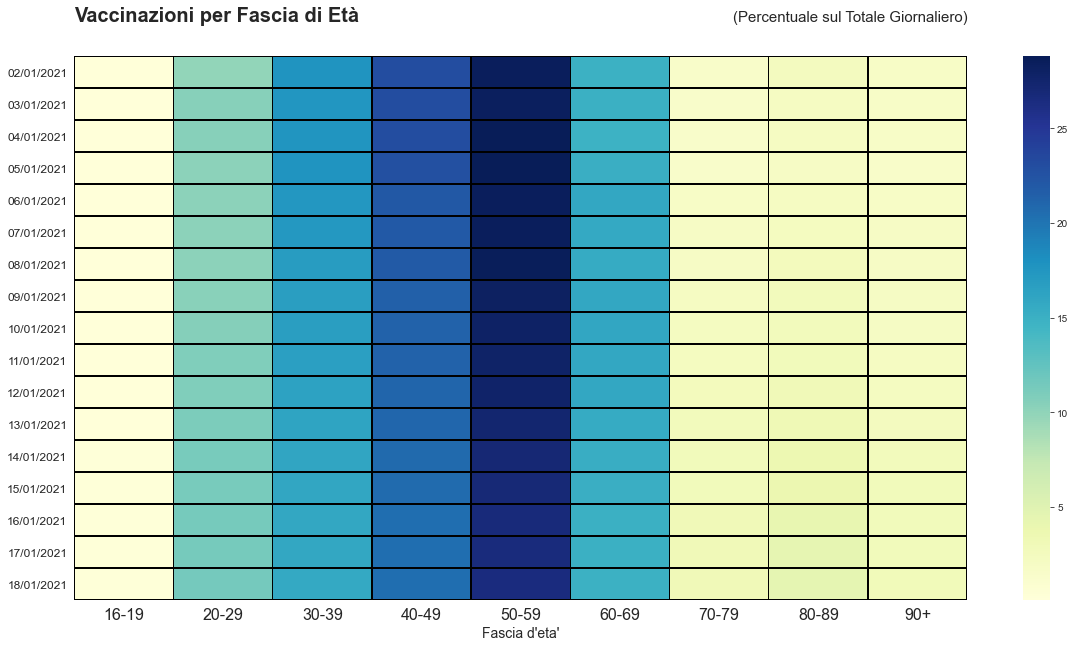

In [1494]:
plt.figure(figsize=(20,10))
sns.heatmap(df_perc, cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.yticks(rotation=0, fontsize=12)
plt.ylabel('')
plt.xlabel("Fascia d'eta'", fontsize=14)
plt.xticks(fontsize=16)
plt.title('Vaccinazioni per Fascia di Età ', fontdict=dict(fontsize=20,weight='bold'), pad=40, loc='left')
plt.title('(Percentuale sul Totale Giornaliero)', loc='right', pad=35, fontsize=15)

plt.savefig("percentuale.png")



In [1495]:
df_p = df.groupby(['dataAggiornamento','fascia'])[['vaccinazioni']].last().reset_index(level=0).pivot(columns='dataAggiornamento',values='vaccinazioni')
df_p.sort_index(ascending=False, inplace=True)

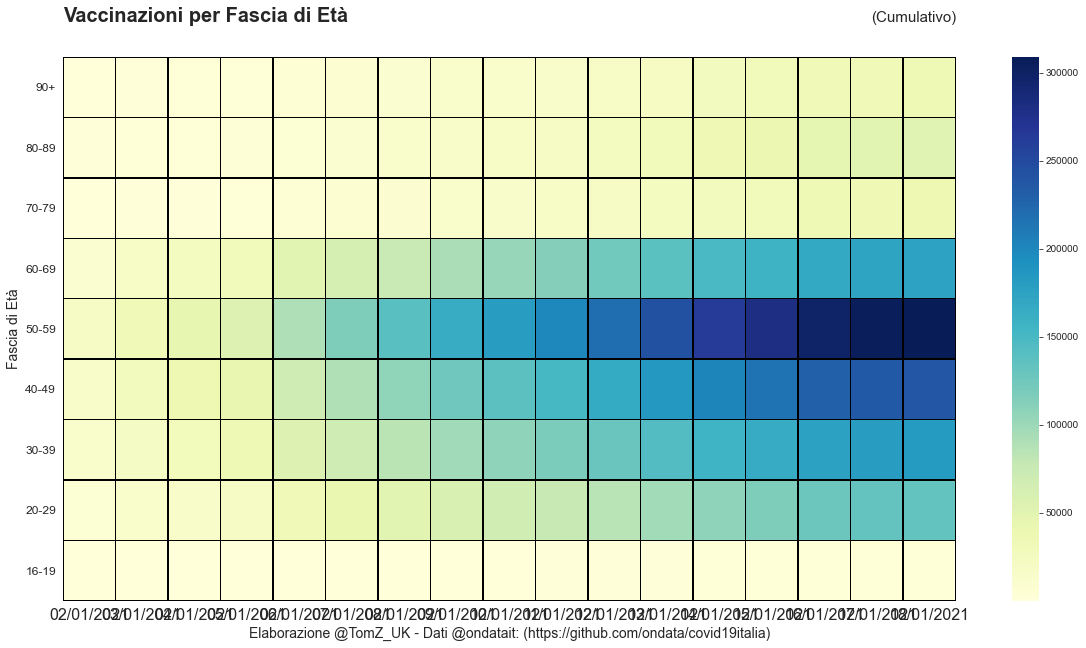

In [1496]:
plt.figure(figsize=(20,10))
sns.heatmap(df_p, cmap='YlGnBu', linewidths=.5, linecolor='black')
plt.yticks(rotation=0, fontsize=12)
plt.ylabel('Fascia di Età', fontsize=14)
plt.xlabel("Elaborazione @TomZ_UK - Dati @ondatait: (https://github.com/ondata/covid19italia)", fontsize=14)
plt.xticks(fontsize=16)
plt.title('Vaccinazioni per Fascia di Età', fontdict=dict(fontsize=20,weight='bold'), pad=25, loc='left')
plt.title('(Cumulativo)', loc='right', pad=35, fontsize=15)

plt.savefig("cumulativo2.png")


In [1497]:
df_perc1 = df1.groupby(['dataAggiornamento','fascia'])[['perc_tot']].last().reset_index().pivot(columns='dataAggiornamento',index='fascia',values='perc_tot')
df_perc1.sort_index(ascending=False, inplace=True)

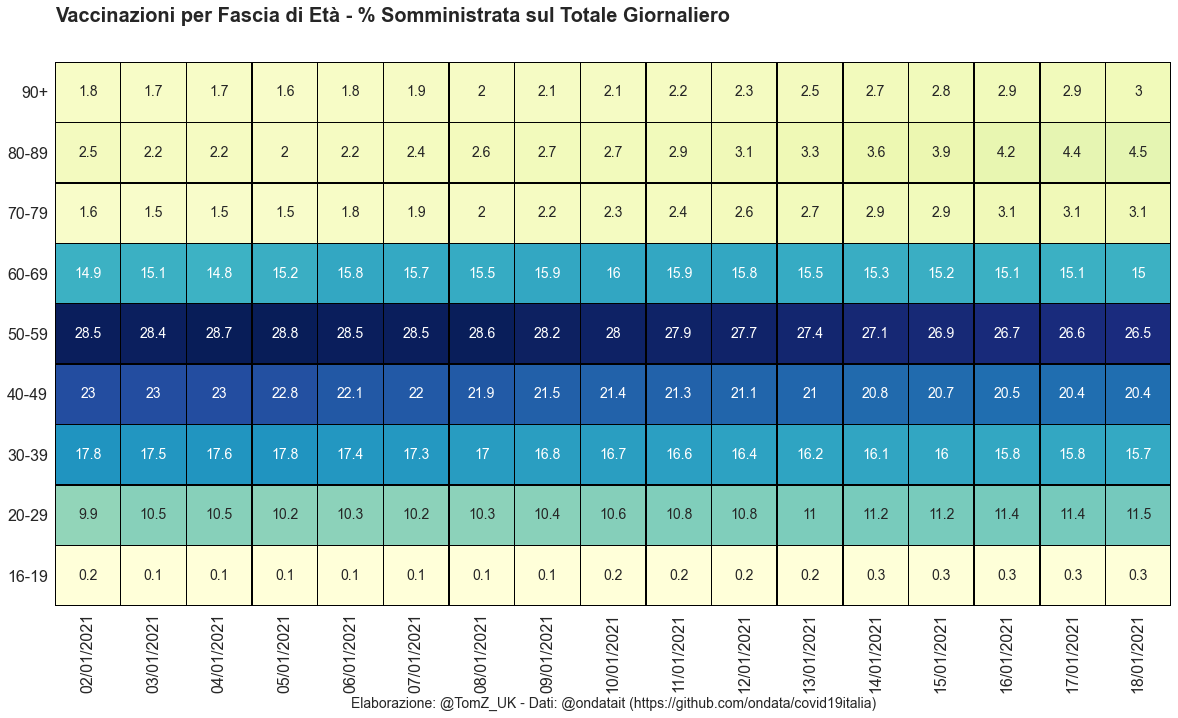

In [1498]:
plt.figure(figsize=(20,10))
sns.heatmap(df_perc1, cmap='YlGnBu', linewidths=.5, linecolor='black',annot=True, fmt="g", annot_kws={'fontsize':14}, cbar=False)
plt.yticks(rotation=0, fontsize=16)
plt.ylabel("")
plt.xlabel("Elaborazione: @TomZ_UK - Dati: @ondatait (https://github.com/ondata/covid19italia)", fontsize=14)
plt.xticks(fontsize=16, rotation=90)
plt.title('Vaccinazioni per Fascia di Età - % Somministrata sul Totale Giornaliero ', fontdict=dict(fontsize=20,weight='bold'), pad=40, loc='left')
#plt.title('(Percentuale sul Totale Giornaliero)', loc='right', pad=35, fontsize=15)

plt.savefig("percentuale2.png")


# Categories

In [1499]:
cat = pd.read_csv('https://raw.githubusercontent.com/ondata/covid19italia/master/webservices/vaccini/processing/categoriaTop.csv')
cat = cat[['dataAggiornamento','categoria','vaccinazioni']]
cat.dataAggiornamento = pd.to_datetime(cat.dataAggiornamento).dt.date
cat.dataAggiornamento = pd.to_datetime(cat.dataAggiornamento).dt.strftime("%d/%m/%Y")
cat

,dataAggiornamento,categoria,vaccinazioni
0,02/01/2021,1 - Operatori Sanitari e Sociosanitari,61683
1,02/01/2021,2 - Personale non Sanitario,6227
2,02/01/2021,3 - Ospiti Strutture Residenziali,4487
3,03/01/2021,1 - Operatori Sanitari e Sociosanitari,105232
4,03/01/2021,2 - Personale non Sanitario,6170
5,03/01/2021,3 - Ospiti Strutture Residenziali,6634
6,04/01/2021,1 - Operatori Sanitari e Sociosanitari,140342
7,04/01/2021,2 - Personale non Sanitario,8968
8,04/01/2021,3 - Ospiti Strutture Residenziali,8869
9,05/01/2021,1 - Operatori Sanitari e Sociosanitari,166364


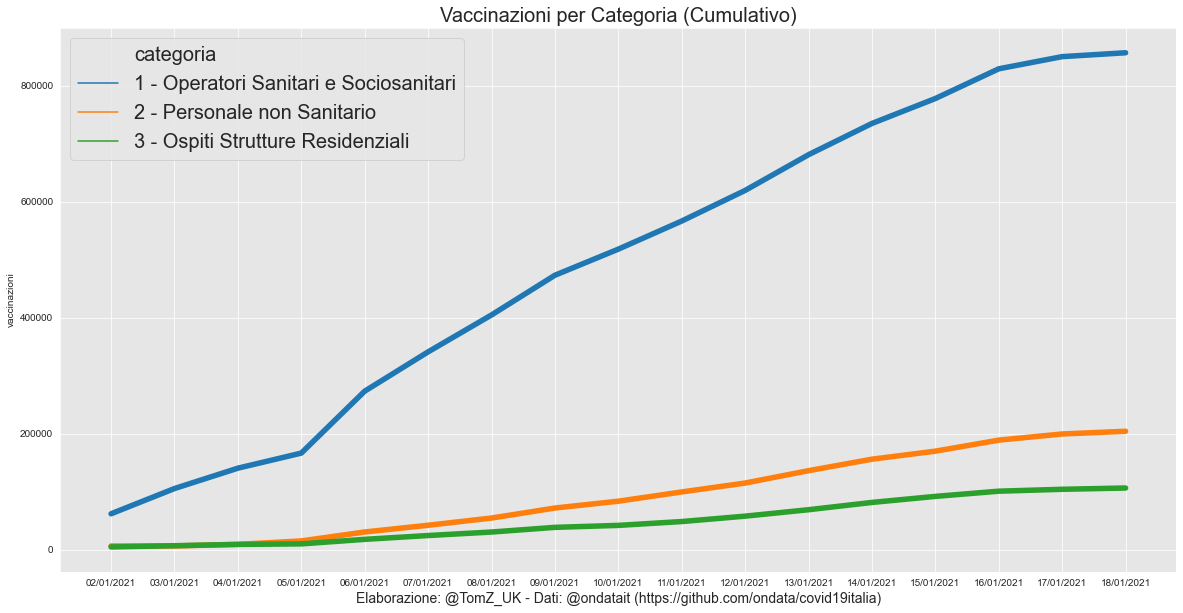

In [1500]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(data=cat,x='dataAggiornamento',y='vaccinazioni', hue='categoria', linewidth=5.5)
plt.legend(prop={'size': 20})
plt.title('Vaccinazioni per Categoria (Cumulativo)', fontsize=20)
plt.xlabel("Elaborazione: @TomZ_UK - Dati: @ondatait (https://github.com/ondata/covid19italia)", fontsize=14)

plt.savefig("categorie.png")




In [1501]:
cat_daily = cat.groupby('dataAggiornamento')[['vaccinazioni']].sum().reset_index()
cat_daily

,dataAggiornamento,vaccinazioni
0,02/01/2021,72397
1,03/01/2021,118036
2,04/01/2021,158179
3,05/01/2021,191011
4,06/01/2021,321077
5,07/01/2021,407044
6,08/01/2021,489187
7,09/01/2021,583050
8,10/01/2021,643219
9,11/01/2021,714306


In [1502]:
cat.categoria = cat.categoria.str.lstrip('1 - ')
cat.categoria = cat.categoria.str.lstrip('2 - ')
cat.categoria = cat.categoria.str.lstrip('3 - ')

In [1503]:
cat = cat.merge(cat_daily, left_on='dataAggiornamento', right_on='dataAggiornamento', how='inner', suffixes=('','_totale_giorno'))
cat['perc_tot'] = (cat.vaccinazioni/cat.vaccinazioni_totale_giorno).mul(100).round(2)
cat

,dataAggiornamento,categoria,vaccinazioni,vaccinazioni_totale_giorno,perc_tot
0,02/01/2021,Operatori Sanitari e Sociosanitari,61683,72397,85.20
1,02/01/2021,Personale non Sanitario,6227,72397,8.60
2,02/01/2021,Ospiti Strutture Residenziali,4487,72397,6.20
3,03/01/2021,Operatori Sanitari e Sociosanitari,105232,118036,89.15
4,03/01/2021,Personale non Sanitario,6170,118036,5.23
5,03/01/2021,Ospiti Strutture Residenziali,6634,118036,5.62
6,04/01/2021,Operatori Sanitari e Sociosanitari,140342,158179,88.72
7,04/01/2021,Personale non Sanitario,8968,158179,5.67
8,04/01/2021,Ospiti Strutture Residenziali,8869,158179,5.61
9,05/01/2021,Operatori Sanitari e Sociosanitari,166364,191011,87.10


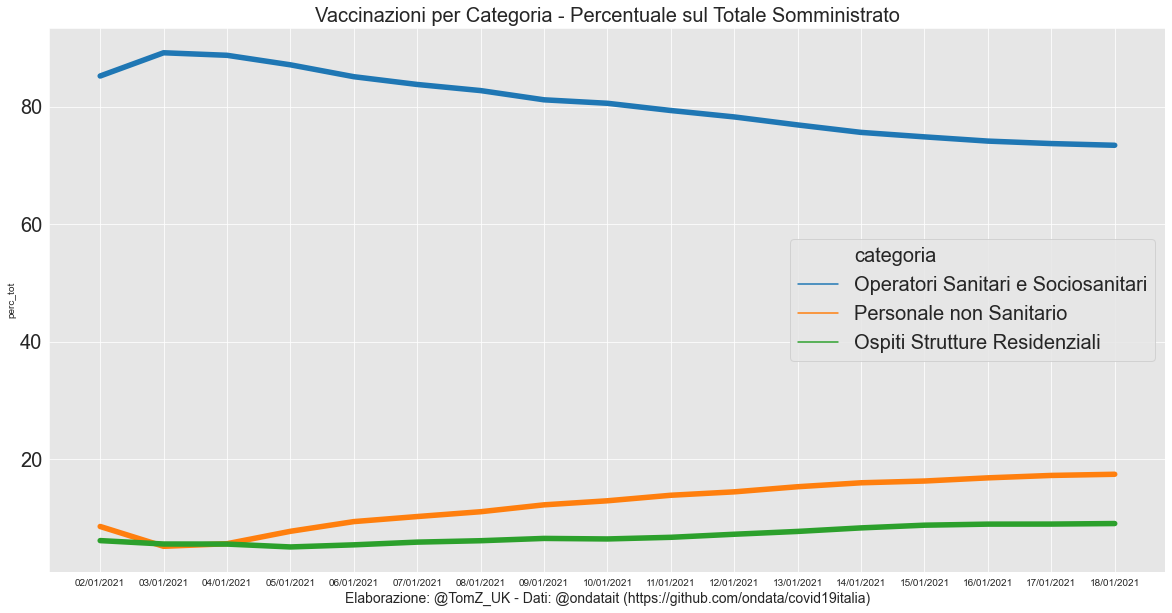

In [1504]:
plt.figure(figsize=(20,10))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(data=cat,x='dataAggiornamento',y='perc_tot', hue='categoria', linewidth=5.5)
plt.legend(prop={'size': 20})
plt.title('Vaccinazioni per Categoria - Percentuale sul Totale Somministrato', fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Elaborazione: @TomZ_UK - Dati: @ondatait (https://github.com/ondata/covid19italia)", fontsize=14)

plt.savefig('categorie_pct.png')


In [1505]:
df_hist = df.groupby('fascia')[['vaccinazioni']].last().reset_index()
df_hist

,fascia,vaccinazioni
0,16-19,3619
1,20-29,133795
2,30-39,183282
3,40-49,237728
4,50-59,308866
5,60-69,175491
6,70-79,36753
7,80-89,52938
8,90+,34551


Text(0.5, 1.0, 'Totale Vaccinazioni Eseguite')

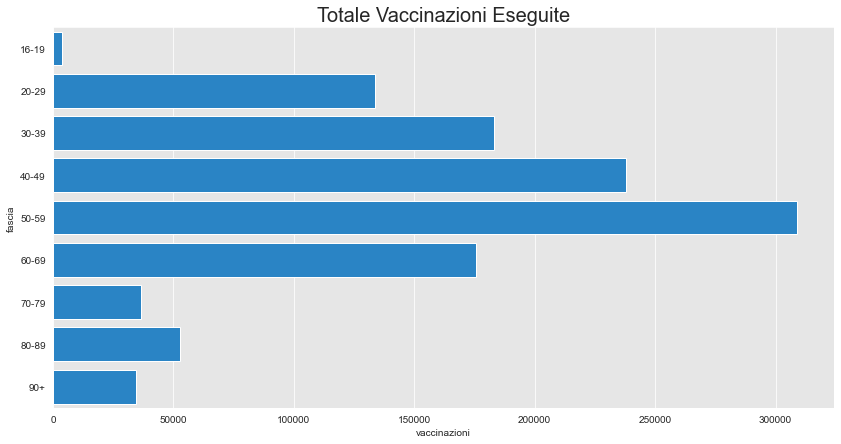

In [1506]:
plt.figure(figsize=(14,7))
sns.barplot(data = df_hist, x='vaccinazioni',y='fascia', color='#1088DF').set_title('Totale Vaccinazioni Eseguite', fontsize=20)

In [1507]:
df1

,fascia,dataAggiornamento,vaccinazioni,vaccinazioni_totale_giorno,perc_tot
0,16-19,02/01/2021,109,72397,0.2
1,20-29,02/01/2021,7195,72397,9.9
2,30-39,02/01/2021,12869,72397,17.8
3,40-49,02/01/2021,16619,72397,23.0
4,50-59,02/01/2021,20601,72397,28.5
...,...,...,...,...,...
148,50-59,18/01/2021,308866,1167023,26.5
149,60-69,18/01/2021,175491,1167023,15.0
150,70-79,18/01/2021,36753,1167023,3.1
151,80-89,18/01/2021,52938,1167023,4.5


# PHE data

In [1508]:
cases = pd.read_csv('https://api.coronavirus.data.gov.uk/v2/data?areaType=overview&metric=newCasesBySpecimenDateAgeDemographics&format=csv', sep=',')
cases = cases[['date','age','cases','rollingRate','rollingSum']]
cases.date = pd.to_datetime(cases['date'])
cases.date = cases.date.dt.strftime("%d-%m-%Y")
cases.date = pd.to_datetime(cases['date'])

cases.sort_values(by='date', inplace=True)
cases = cases[(cases.age != 'unassigned') & (cases.age != '00_59') & (cases.age !='60+')]

In [1509]:
cases.sort_values('date', ascending=False, inplace=True)

In [1510]:
cases.groupby(['date','age'])[['cases']
                             ].sum().reset_index()

,date,age,cases
0,2020-01-02,00_04,0
1,2020-01-02,05_09,0
2,2020-01-02,10_14,0
3,2020-01-02,15_19,0
4,2020-01-02,20_24,0
...,...,...,...
6702,2021-12-01,70_74,1137
6703,2021-12-01,75_79,964
6704,2021-12-01,80_84,928
6705,2021-12-01,85_89,922


In [1511]:
cases_p = cases.pivot(columns='age', index='date',values='rollingRate').reset_index()

In [1512]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6707 entries, 88 to 7657
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6707 non-null   datetime64[ns]
 1   age          6707 non-null   object        
 2   cases        6707 non-null   int64         
 3   rollingRate  6707 non-null   float64       
 4   rollingSum   6707 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 314.4+ KB


In [1513]:
cases_p.sort_values('date', inplace=True)
cases_p.date = cases_p.date.dt.strftime("%d-%m-%Y")
cases_p.set_index('date', inplace=True)

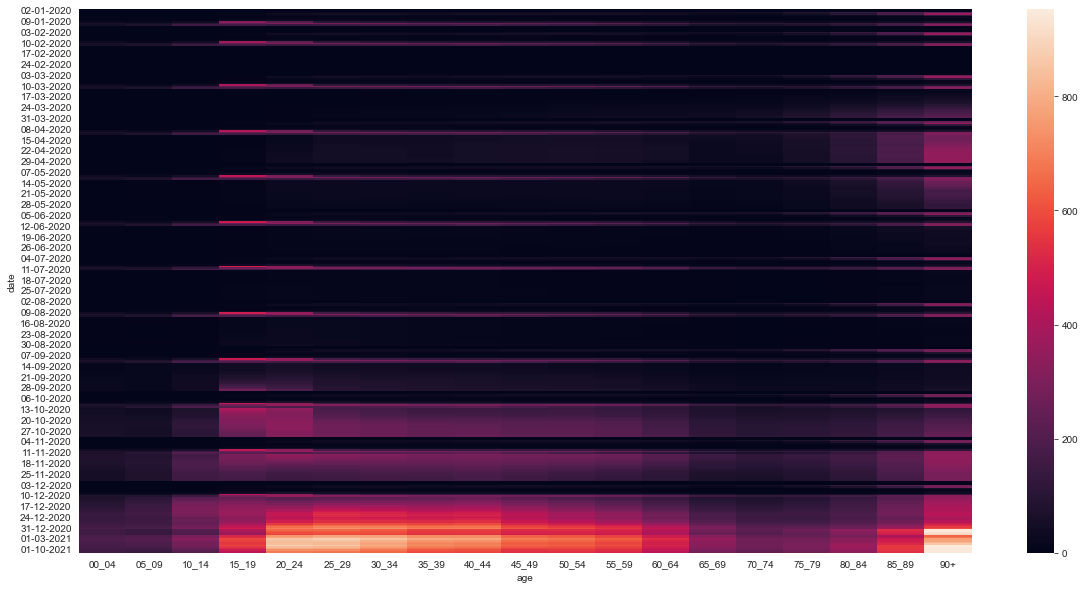

In [1514]:
plt.figure(figsize=(20,10))
sns.heatmap(cases_p)

In [1515]:
cases_p.columns

Index(['00_04', '05_09', '10_14', '15_19', '20_24', '25_29', '30_34', '35_39',
       '40_44', '45_49', '50_54', '55_59', '60_64', '65_69', '70_74', '75_79',
       '80_84', '85_89', '90+'],
      dtype='object', name='age')

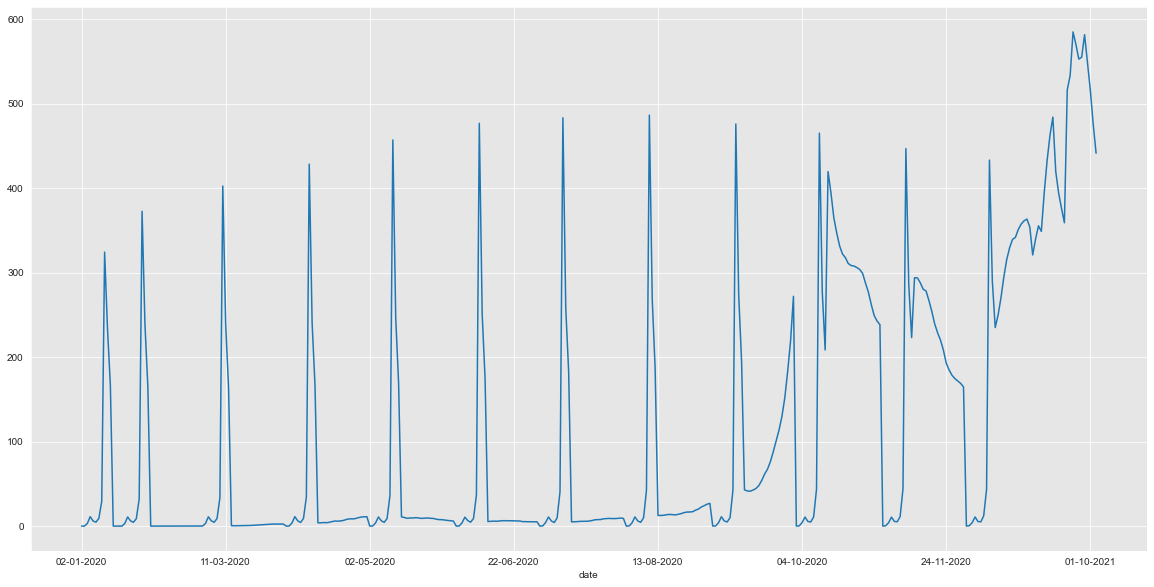

In [1516]:
cases_p['15_19'].plot(figsize=(20,10))

In [1517]:
cases_p.index

Index(['02-01-2020', '03-01-2020', '04-01-2020', '05-01-2020', '06-01-2020',
       '07-01-2020', '08-01-2020', '09-01-2020', '10-01-2020', '11-01-2020',
       ...
       '01-03-2021', '01-04-2021', '01-05-2021', '01-06-2021', '01-07-2021',
       '01-08-2021', '01-09-2021', '01-10-2021', '01-11-2021', '01-12-2021'],
      dtype='object', name='date', length=353)

In [1518]:
prev = cases.groupby(['date','age'])[['rollingRate']].last().reset_index()
prev = prev[prev.date > '2020-11-01']


In [1519]:
prevp = prev.pivot(index='age',columns='date',values='rollingRate').reset_index()
prevp

date,age,2020-11-02 00:00:00,2020-11-03 00:00:00,2020-11-04 00:00:00,2020-11-05 00:00:00,2020-11-06 00:00:00,2020-11-07 00:00:00,2020-11-08 00:00:00,2020-11-09 00:00:00,2020-11-10 00:00:00,...,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00
0,00_04,0.0,0.1,3.2,1.3,1.9,2.4,4.6,10.8,42.2,...,186.0,197.0,186.1,177.2,175.7,180.8,172.6,164.8,160.7,160.5
1,05_09,0.0,0.1,1.5,3.4,2.6,2.4,4.3,16.3,31.9,...,196.7,214.3,203.7,193.1,189.3,193.8,180.7,168.4,153.8,148.1
2,10_14,0.0,0.3,1.9,4.6,3.0,3.4,4.9,18.4,68.0,...,301.9,323.2,301.3,285.6,279.3,285.9,266.2,248.2,227.4,215.3
3,15_19,0.0,0.4,4.0,10.6,5.5,5.1,11.2,44.1,446.8,...,533.5,584.9,570.0,552.7,555.0,581.6,549.0,516.0,475.4,441.3
4,20_24,0.0,1.2,16.7,24.6,11.1,8.0,17.4,64.8,344.1,...,774.3,854.4,843.2,826.6,838.6,880.3,836.4,789.1,732.8,684.9
5,25_29,0.0,1.8,36.0,31.3,12.9,9.1,16.1,47.6,171.3,...,807.0,880.0,848.2,823.7,826.3,860.1,818.3,772.3,722.4,681.1
6,30_34,0.0,1.8,38.0,30.8,12.7,8.7,15.4,42.7,153.7,...,789.5,847.2,810.1,781.8,775.3,803.1,759.9,718.9,677.7,644.4
7,35_39,0.0,1.5,33.5,27.5,10.6,8.4,13.6,36.9,136.7,...,734.7,787.5,747.5,719.0,710.4,732.4,688.5,652.2,617.6,592.1
8,40_44,0.0,1.5,41.9,30.7,11.5,8.7,12.9,34.3,135.2,...,734.8,781.9,737.0,704.2,694.3,714.4,671.4,634.6,605.3,584.9
9,45_49,0.0,1.6,49.4,32.6,10.1,6.7,10.5,30.5,131.5,...,645.0,691.7,657.9,630.2,626.1,646.7,610.9,579.5,549.4,533.2


In [1520]:
prevp.age = prevp.age.str.replace('_','-')
prevp.set_index('age', inplace=True)
prevp.sort_index(ascending=False,inplace=True)
prevp.columns = pd.to_datetime(prevp.columns).date
#prevp.columns = prevp.columns.dt.date


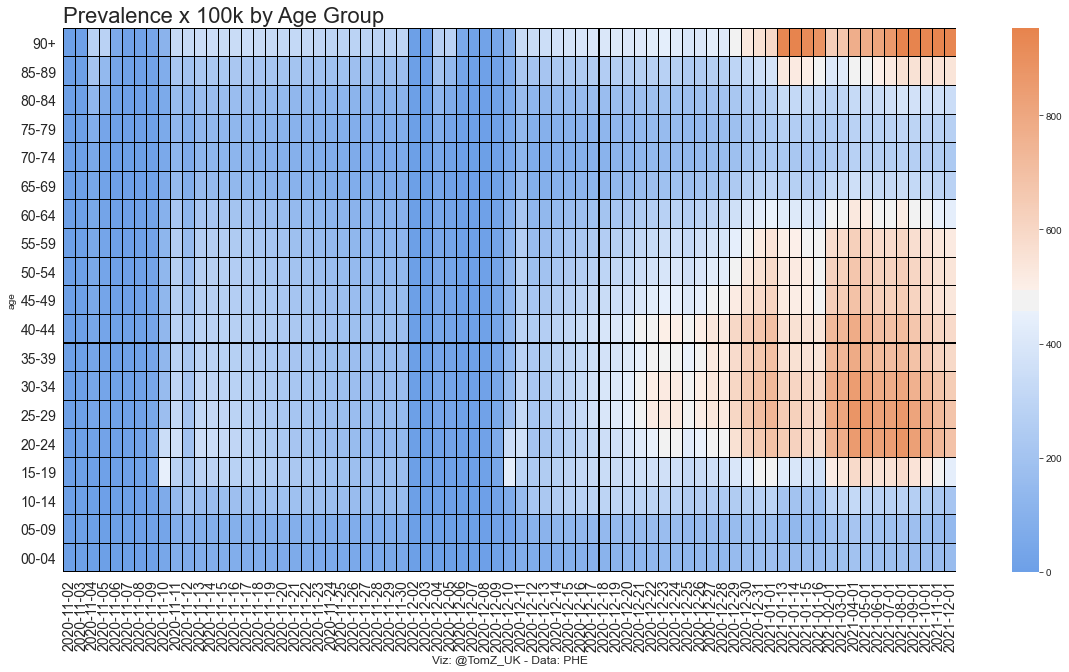

In [1521]:
plt.figure(figsize=(20,10))
sns.heatmap(prevp, cmap=sns.diverging_palette(250, 30, l=65,  as_cmap=True), linewidth=0.02,
           linecolor='black').set_title('Prevalence x 100k by Age Group', fontsize=22, loc='left')
plt.xlabel('Viz: @TomZ_UK - Data: PHE', fontsize=12)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(fontsize=14)

plt.savefig('prevalence.png')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5,
        66.5, 67.5, 68.5, 69.5, 70.5, 71.5, 72.5, 73.5, 74.5]),
 <a list of 75 Text major ticklabel objects>)

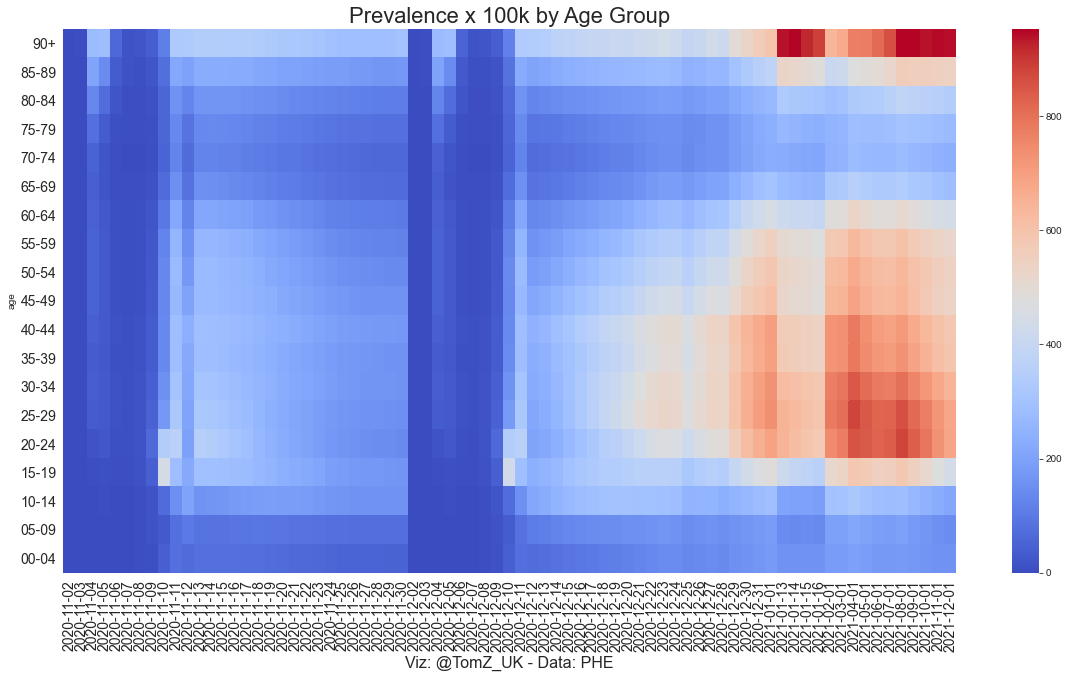

In [1522]:
plt.figure(figsize=(20,10))
sns.heatmap(prevp, cmap='coolwarm').set_title('Prevalence x 100k by Age Group', fontsize=22)
plt.xlabel('Viz: @TomZ_UK - Data: PHE', fontsize='16')
plt.yticks(rotation=0, fontsize=14)
plt.xticks(fontsize=14)


In [1523]:
cases.groupby('age')['cases'].value_counts(normalize=True)

age    cases
00_04  0        0.107649
       8        0.033994
       15       0.031161
       10       0.025496
       16       0.025496
                  ...   
90+    978      0.002833
       989      0.002833
       992      0.002833
       1030     0.002833
       1067     0.002833
Name: cases, Length: 4236, dtype: float64